# This time we are going to train and predict on titanic dataset.

#### To do this we have taken the columns which showed some correlation with the survival rates and dropped others. Here, we will try to get accuracy near to 1 as much as possible and keep the model out of overfitting scenarios. 

In [3]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing things to get-started!

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.grid_search import GridSearchCV


/home/bean/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/bean/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
all_data=pd.read_csv(".ipynb_checkpoints/train.csv",)

In [6]:
drop_column = ['PassengerId','Cabin', 'Ticket']
all_data.drop(drop_column, axis=1, inplace = True)

all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)
all_data['Fare'] = all_data['Fare'].astype(int)
all_data['Age'].fillna(all_data.groupby(["Sex"])["Age"].transform(np.mean), inplace=True)

x_train = all_data.drop(["Survived","Name"], axis=1)
y_train = all_data["Survived"]


### Some Columns are dropped right away like 'PassengerID' ,'Cabin' and 'Ticket' which do not show any relation with survival data and other are more 'NaN' values which signifies nothing to the outcome.

In [7]:

x_train=pd.concat([x_train,pd.get_dummies(x_train['Embarked'])],axis=1)
x_train.drop('Embarked',axis=1,inplace=True)


x_train=pd.concat([x_train,pd.get_dummies(x_train['Sex'])],axis=1)
x_train.drop('Sex',axis=1,inplace=True)



### OneHotEncoding
#### The categorical data  were converted to multiple binary columns so that model could interpret it and fit with the data.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state =23)


### As the dataset did not come with seperate testing data, it was needed to split the training data into test data.
### The ground truth was seperated and put as Y_train and Y_test

## Random Forest

In [9]:
random_forest = RandomForestClassifier(n_estimators=100)
# display(X_train,Y_train)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)
# display(Y_prediction)
display(random_forest.score(X_train, Y_train))
display(random_forest.score(X_test, Y_test))
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

target_names = ['Dead', 'Survive']
confusion_matrix(Y_prediction,Y_test)
print(classification_report(Y_test, Y_prediction, target_names=target_names))

0.964765100671141

0.8135593220338984

             precision    recall  f1-score   support

       Dead       0.86      0.84      0.85       188
    Survive       0.73      0.77      0.75       107

avg / total       0.82      0.81      0.81       295



### RandomForestClassifier model was trained and used to predict the test data, where we found the accuracy of  about 80 % , while the train data had the accuracy of 96% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 

### The sensitivity or recall was found to be of 82 percent 



--

## S-Gradient Descent

In [20]:
SGD=SGDClassifier()
SGD.fit(X_train,Y_train)

Y_pred=SGD.predict(X_test)
print(SGD.score(X_train,Y_train)*100)
print(SGD.score(X_test,Y_test)*100)
acc_sgd=round(SGD.score(X_test,Y_test)*100,2)
confusion_matrix(Y_test,Y_prediction)
print(classification_report(Y_test, Y_pred, target_names=target_names))

66.10738255033557
69.49152542372882
             precision    recall  f1-score   support

       Dead       0.68      0.99      0.81       188
    Survive       0.90      0.18      0.30       107

avg / total       0.76      0.69      0.62       295



/home/bean/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### SGD or Stochastic Gradient Descent model was trained and used to predict the test data, where we found the accuracy of  about 69 % , while the train data had the accuracy of 66% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 

### The sensitivity or recall was found to be of 69 percent 

## Train data accuracy : 66%

## Test data accuracy : 69%
--

## KNN

In [23]:
KNN= KNeighborsClassifier(n_neighbors = 9,weights='distance',algorithm='ball_tree') 
KNN.fit(X_train, Y_train) 
Y_pred = KNN.predict(X_test)
acc_knn = round(KNN.score(X_test, Y_test) * 100, 2)
acc_knntrn = round(KNN.score(X_train, Y_train) * 100, 2)
print(acc_knn)
print(acc_knntrn)

confusion_matrix(Y_test,Y_prediction)
print(classification_report(Y_test, Y_pred, target_names=target_names))

77.29
96.48
             precision    recall  f1-score   support

       Dead       0.81      0.85      0.83       188
    Survive       0.70      0.64      0.67       107

avg / total       0.77      0.77      0.77       295



### KNN or K-NearestNeighbors model was trained and used to predict the test data, where we found the accuracy of  about 77 % , while the train data had the accuracy of 96% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 


## Train data accuracy : 96%

## Test data accuracy : 77%
--

## SVM

In [25]:
svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=.093, kernel='rbf',
    max_iter=-1, probability=True, random_state=33, shrinking=False,
    tol=0.1, verbose=False)
svm.fit(X_train,Y_train)
Y_pred=svm.predict(X_test)
acc_svc=round(svm.score(X_test,Y_test)*100,2)
acc_svctrn = round(KNN.score(X_train, Y_train) * 100, 2)
print(acc_svctrn)
print(acc_svc)
print(classification_report(Y_test, Y_pred, target_names=target_names))

96.48
76.61
             precision    recall  f1-score   support

       Dead       0.80      0.84      0.82       188
    Survive       0.69      0.64      0.66       107

avg / total       0.76      0.77      0.76       295



### SVC or Support Vector Classifier model was trained and used to predict the test data, where we found the accuracy of  about 76 % , while the train data had the accuracy of 96% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 


## Train data accuracy : 96%

## Test data accuracy : 76%
--

## DTC

In [32]:
DTC=DecisionTreeClassifier(max_depth=9,random_state=23)
DTC.fit(X_train,Y_train)
Y_pred=DTC.predict(X_test)
acc_dtc=round(DTC.score(X_test,Y_test)*100,2)
acc_dtctrn=round(DTC.score(X_train,Y_train)*100,2)
print(acc_dtc)
print(acc_dtctrn)

print(classification_report(Y_test, Y_pred, target_names=target_names))

82.71
91.28
             precision    recall  f1-score   support

       Dead       0.82      0.93      0.87       188
    Survive       0.83      0.65      0.73       107

avg / total       0.83      0.83      0.82       295



### DTC or DecisionTreeClassifier model was trained and used to predict the test data, where we found the accuracy of  about 82 % , while the train data had the accuracy of 91% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 


## Train data accuracy : 91%

## Test data accuracy : 82%
--

## Perceptron

In [33]:
perceptron=Perceptron(penalty='l1',random_state=0,max_iter=2)
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_test,Y_test)*100,2)
acc_perceptrain=round(DTC.score(X_train,Y_train)*100,2)
print(acc_perceptrain)
print(acc_perceptron)
print(classification_report(Y_test, Y_pred, target_names=target_names))

91.28
72.2
             precision    recall  f1-score   support

       Dead       0.70      0.98      0.82       188
    Survive       0.88      0.27      0.41       107

avg / total       0.77      0.72      0.67       295



### Perceptron model was trained and used to predict the test data, where we found the accuracy of  about 72 % , while the train data had the accuracy of 91% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 


## Train data accuracy : 91%

## Test data accuracy : 72%
--

## Gaussian

In [34]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussiantrain=round(DTC.score(X_train,Y_train)*100,2)
print(acc_gaussiantrain)

print(acc_gaussian)
print(classification_report(Y_test, Y_pred, target_names=target_names))

91.28
78.64
             precision    recall  f1-score   support

       Dead       0.85      0.81      0.83       188
    Survive       0.69      0.74      0.71       107

avg / total       0.79      0.79      0.79       295



### Gaussian model was trained and used to predict the test data, where we found the accuracy of  about 78 % , while the train data had the accuracy of 91% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 



## Train data accuracy : 91%

## Test data accuracy : 78%
--

## Logistic Regression

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)


acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_logtrn = round(logreg.score(X_train, Y_train) * 100, 2)

print(acc_logtrn)
print(acc_log)
print(classification_report(Y_test, Y_pred, target_names=target_names))

81.21
79.66
             precision    recall  f1-score   support

       Dead       0.83      0.86      0.84       188
    Survive       0.74      0.68      0.71       107

avg / total       0.79      0.80      0.79       295



### Logistic Regression Classifier model was trained and used to predict the test data, where we found the accuracy of  about 81 % , while the train data had the accuracy of 79% so we can say that the model which had default hyper-parameters as they do in sklearn was heavily overfitted the train data. 


## Train data accuracy : 81%

## Test data accuracy : 79%
--

In [67]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_dtc]})
results.sort_values(by='Score', ascending=False).set_index('Score').head(9)


,Model
Score,
82.71,Decision Tree
81.36,Random Forest
79.66,Logistic Regression
78.64,Naive Bayes
77.29,KNN
76.61,Support Vector Machines
72.20,Perceptron
69.49,Stochastic Gradient Decent


## The randomforest and the decision Tree  classifiet have shown the highest amount of accuracy in the comparison.

In [18]:
random_forest2 = RandomForestClassifier(n_estimators=100)
param_grid2 = {"n_estimators": [8,9,10],
              "max_depth": [4,5,6],
              "min_samples_split": [20,21,22],
              "min_samples_leaf": [5,6,7],
              "max_leaf_nodes": [18,19,20],
              "min_weight_fraction_leaf": [0.01,0.02,0.03],
               "random_state":[32]}
grid_search = GridSearchCV(random_forest2, param_grid=param_grid2,n_jobs=4,verbose=0)
grid_search.fit(X_train,Y_train)
g_model =grid_search.best_estimator_
display(grid_search.best_params_)
print(grid_search.best_score_)
y_pred=g_model.predict(X_test)
acc_grid_RandF = round(g_model.score(X_train, Y_train) * 100, 2)
print(acc_grid_RandF)

{'max_depth': 5,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 6,
 'min_samples_split': 21,
 'min_weight_fraction_leaf': 0.01,
 'n_estimators': 9,
 'random_state': 32}

0.8204697986577181
84.23


## We did GridSearch on the randomforest classifier to fine tune the hyper-parameters and we have found some optimal-paramaters to reach up to 84% of accuracy

In [79]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(g_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
female,0.354
male,0.167
Pclass,0.150
Fare,0.132
Age,0.116
SibSp,0.027
Parch,0.025
Q,0.015
S,0.011


## Above importance table shows the impact of each feature made in the model and predicitions. 
### Female and Male feature made a huge importance on the model and Pclass comes next
### The features shown here as high importance are same as the features we had found to be of importance in EDA segment

# Summary



### -- Some Columns were dropped right away like 'PassengerID' ,'Cabin' and 'Ticket' did not have any relation with survival data and other columns with large amount of  'NaN' values which signifies nothing to the outcome.

### -- As the dataset did not come with seperate testing data, it was needed to split the training data into test data.
### -- The ground truth was seperated and put as Y_train and Y_test

### --The categorical data  were converted to multiple binary columns so that model could interpret it and fit with the data.

### Classifiers used:


In [81]:
results.set_index('Score').head(9)

,Model
Score,
76.61,Support Vector Machines
77.29,KNN
79.66,Logistic Regression
81.36,Random Forest
78.64,Naive Bayes
72.20,Perceptron
69.49,Stochastic Gradient Decent
82.71,Decision Tree


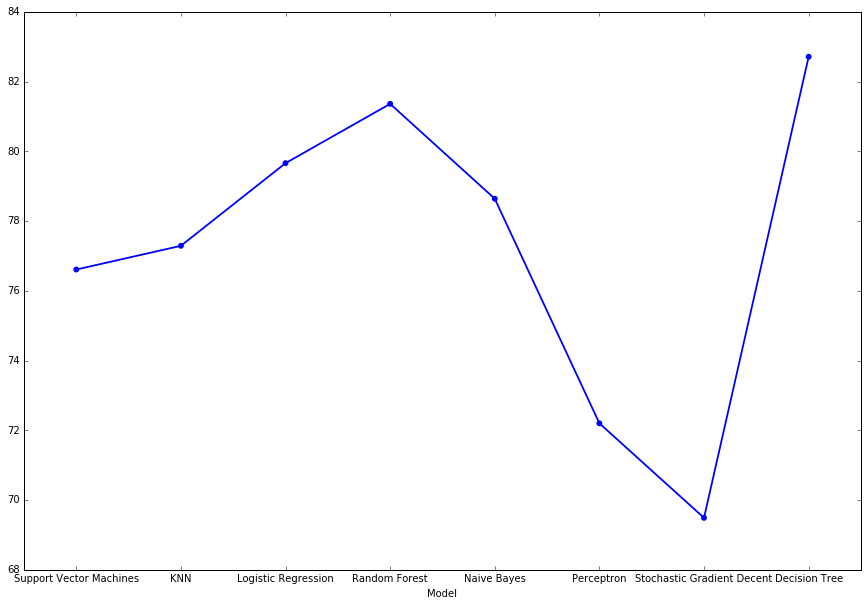

In [76]:
plt.figure(figsize=(15,10))
sns.pointplot(y=np.array(results.Score),x=results.Model)

### -- The DecisionTreeClassifier model had the best accuracy of 82%

### -- We did some parameters tuning on RandomClassifier and found some optimal parameters with upto 84% of accuracy

### -- Female and Male feature made a huge importance on the model and Pclass comes next
### -- The features shown here as high importance are same as the features we had found to be of importance in EDA segment